#  Step 1: Installation and Setup

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.13.0'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [5]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [6]:
# Loading the dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

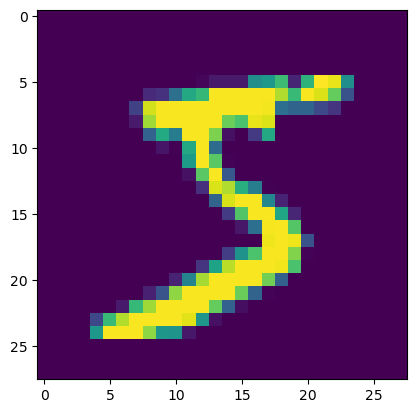

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [10]:
x_train.min(),x_train.max()

(0, 255)

In [11]:
y_train.min(),y_train.max()

(0, 9)

In [12]:
#normalize the images
x_train= x_train/255
x_test= x_test/255

In [13]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [14]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
#reshape the images
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [16]:
x_train.shape,x_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
x_train[0].shape

(28, 28, 1)

# Step 3: Building the Model

In [18]:
# define the model
model = tf.keras.models.Sequential()

In [19]:
# Adding the FIRST CNN layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))

# Adding the SECOND CNN layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))

#Adding MAXPOOL LAYER
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Adding DROPOUT layer
model.add(tf.keras.layers.Dropout(0.4))

# Adding FLATTEN Layer
model.add(tf.keras.layers.Flatten())

# Adding Fully Connected Layer(Dense Layer)
model.add(tf.keras.layers.Dense(units=128,activation="relu"))

# Adding the output layer
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [21]:
# Compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

# Step 4: Training the model

In [22]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1660 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.0539 - val_sparse_categorical_accuracy: 0.9817
Epoch 2/10
469/469 [==============================] - 58s 124ms/step - loss: 0.0539 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0361 - val_sparse_categorical_accuracy: 0.9880
Epoch 3/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0296 - val_sparse_categorical_accuracy: 0.9906
Epoch 4/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9886
Epoch 5/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0208 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.0329 - val_sparse_categorical_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 63s 134ms/step - loss: 0.0186 -

In [23]:
# Model prediction
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for each class

# Extract the class with the highest probability as the predicted class
y_pred = np.argmax(y_pred_probs, axis=-1)

313/313 [==============================] - 3s 8ms/step


In [28]:
y_pred[7],y_test[7]

(9, 9)

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
confusion_matrix(y_test,y_pred)

array([[ 977,    0,    0,    0,    0,    0,    1,    0,    1,    1],
       [   0, 1132,    1,    0,    0,    1,    0,    0,    1,    0],
       [   1,    2, 1011,    1,    2,    0,    2,    6,    7,    0],
       [   0,    0,    0, 1002,    0,    6,    0,    0,    2,    0],
       [   0,    0,    0,    0,  974,    0,    1,    0,    1,    6],
       [   0,    0,    0,    5,    0,  885,    1,    0,    1,    0],
       [   4,    2,    0,    0,    1,    2,  947,    0,    2,    0],
       [   1,    2,    3,    1,    0,    0,    0, 1017,    2,    2],
       [   1,    0,    1,    0,    0,    0,    1,    0,  971,    0],
       [   0,    0,    0,    1,    6,    4,    0,    3,    3,  992]])

In [26]:
accuracy_score(y_test, y_pred)

0.9908

# Step 5 :Learning Curve

In [29]:
def learning_curve(history,epoch):
    #training vs validation accuracy
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history["sparse_categorical_accuracy"])
    plt.plot(epoch_range,history.history["val_sparse_categorical_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"],loc ="upper left")
    plt.grid(True) 
    plt.show()
    
    #training vs validation loss
    plt.plot(epoch_range,history.history["loss"])
    plt.plot(epoch_range,history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.grid(True) 
    plt.show()

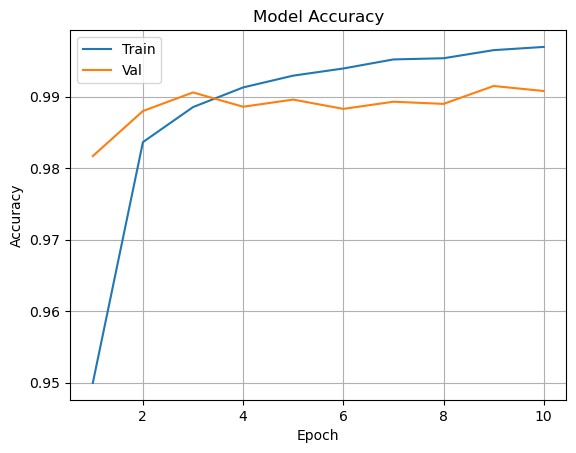

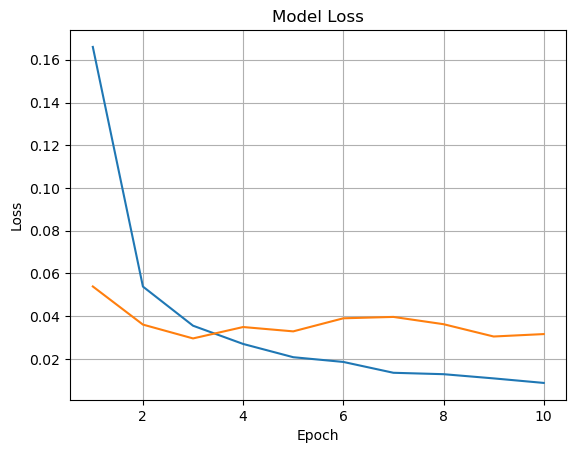

In [30]:
learning_curve(history,10)